### Transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris.loc[:, features].values
y = iris.loc[:,['species']].values

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1',
                                                                  'Principal Component 2','Principal Component 3'])

In [16]:
finalIris = pd.concat([principalDf, iris[['species']]], axis = 1)
finalIris.head()

,Principal Component 1,Principal Component 2,Principal Component 3,species
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


In [18]:
x_vals = finalIris['Principal Component 1']
y_vals = finalIris['Principal Component 2']
z_vals = finalIris['Principal Component 3']

<function matplotlib.pyplot.show(*args, **kw)>

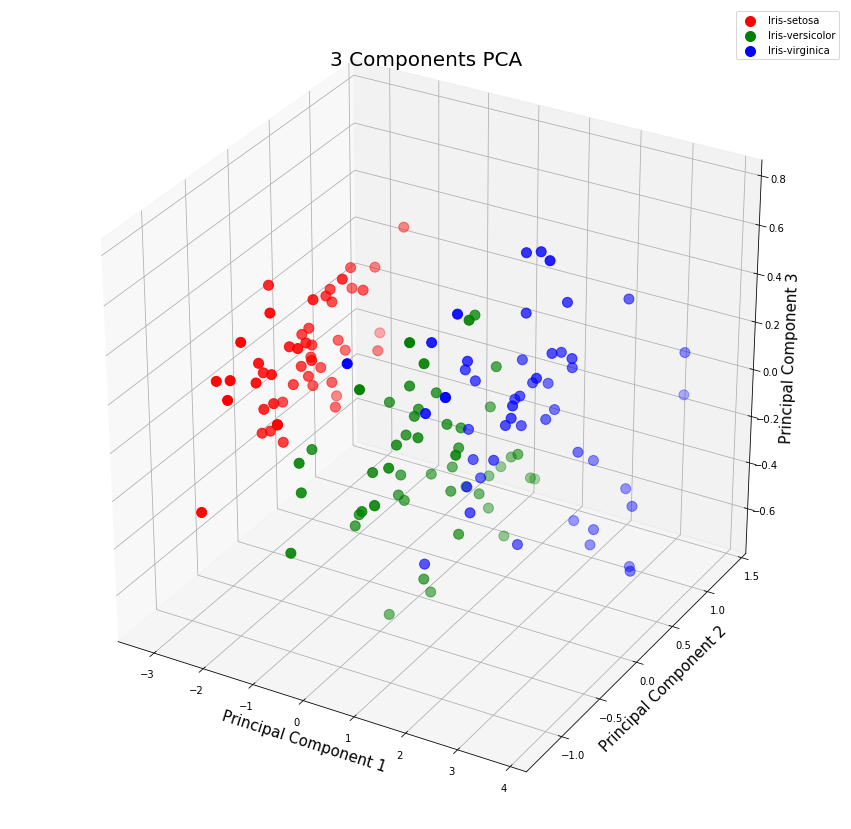

In [25]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Components PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalIris['species'] == target
    ax.scatter(finalIris.loc[indicesToKeep , 'Principal Component 1'],
               finalIris.loc[indicesToKeep , 'Principal Component 2'],
               finalIris.loc[indicesToKeep , 'Principal Component 3'],
               c= color,
               s = 100)
ax.legend(targets)
ax.grid()
plt.show